In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="McrhzGgUVuaQbO2a1BX6")
project = rf.workspace("chandai").project("lunar-scene-analysis-fejkh")
version = project.version(5)
dataset = version.download("coco-segmentation")


loading Roboflow workspace...
loading Roboflow project...


In [2]:
model = project.version(5).model

In [3]:
from tkinter import Tk, filedialog

def pick_image():
    Tk().withdraw()  # hide main window
    file_path = filedialog.askopenfilename(
        title="Select an Image",
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tif *.tiff")]
    )
    return file_path

#image_path = pick_image()
#print("Selected image:", image_path)

In [4]:

# # Run inference on an image (Instance Segmentation)

#image_path = r"D:\Moon Dataset\render\render0122.png"  # use a single image file, not a folder

image_path=pick_image()

# Run prediction
predictions = model.predict(image_path, confidence=40).json()

# Print results
print(predictions)


{'predictions': [{'x': 228.20504188537598, 'y': 340.88739013671875, 'width': 407.29084396362305, 'height': 181.4774169921875, 'confidence': 0.965076744556427, 'class': 'rover path', 'points': [{'x': 389.0, 'y': 250.0}, {'x': 388.0, 'y': 251.0}, {'x': 387.0, 'y': 251.0}, {'x': 386.0, 'y': 252.0}, {'x': 382.0, 'y': 252.0}, {'x': 381.0, 'y': 253.0}, {'x': 377.0, 'y': 253.0}, {'x': 376.0, 'y': 254.0}, {'x': 375.0, 'y': 254.0}, {'x': 375.0, 'y': 256.0}, {'x': 376.0, 'y': 257.0}, {'x': 386.0, 'y': 257.0}, {'x': 387.0, 'y': 258.0}, {'x': 389.0, 'y': 258.0}, {'x': 391.0, 'y': 260.0}, {'x': 391.0, 'y': 261.0}, {'x': 390.0, 'y': 262.0}, {'x': 388.0, 'y': 262.0}, {'x': 387.0, 'y': 263.0}, {'x': 375.0, 'y': 263.0}, {'x': 374.0, 'y': 264.0}, {'x': 373.0, 'y': 264.0}, {'x': 371.0, 'y': 266.0}, {'x': 370.0, 'y': 266.0}, {'x': 369.0, 'y': 267.0}, {'x': 363.0, 'y': 267.0}, {'x': 362.0, 'y': 268.0}, {'x': 349.0, 'y': 268.0}, {'x': 346.0, 'y': 271.0}, {'x': 343.0, 'y': 271.0}, {'x': 342.0, 'y': 272.0}, {

In [5]:
# # Visualize predictions

from PIL import Image, ImageDraw
import cv2
import numpy as np
img = Image.open(image_path)
draw = ImageDraw.Draw(img)

for obj in predictions['predictions']:
   
        points = [(p['x'], p['y']) for p in obj['points']]
        draw.polygon(points, outline="red")
       
   
img.show()
print(img)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=432x432 at 0x1C6D90A07D0>


In [6]:
from location import describe_location

# --- Get image dimensions ---
img_width = int(predictions['image']['width'])
img_height = int(predictions['image']['height'])

# --- Loop through predictions and print user-friendly locations ---
for i, obj in enumerate(predictions['predictions']):
    class_name = obj['class'].capitalize()
    loc_label = describe_location(obj['x'], obj['y'], obj['width'], obj['height'], img_width, img_height)
    
    print(f"{class_name} detected in the {loc_label} area of the image.")


Rover path detected in the bottom-right area of the image.
Artifact detected in the middle-center area of the image.
Rocky region detected in the top-right area of the image.
Crater detected in the bottom-right area of the image.


Rocky region detected in the top-right area of the image:
  Diameter: 0.21 m
  Area: 0.01 m²



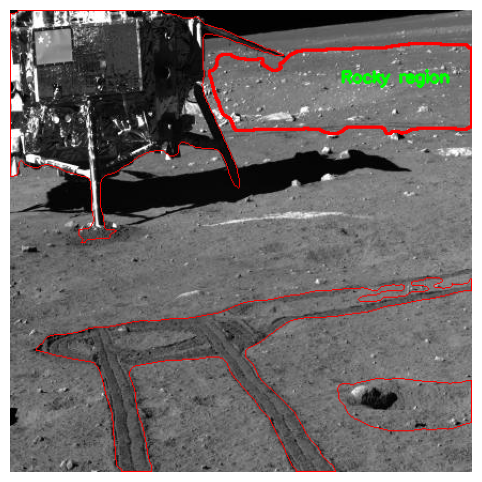

Crater detected in the bottom-right area of the image:
  Diameter: 0.11 m
  Area: 0.00 m²



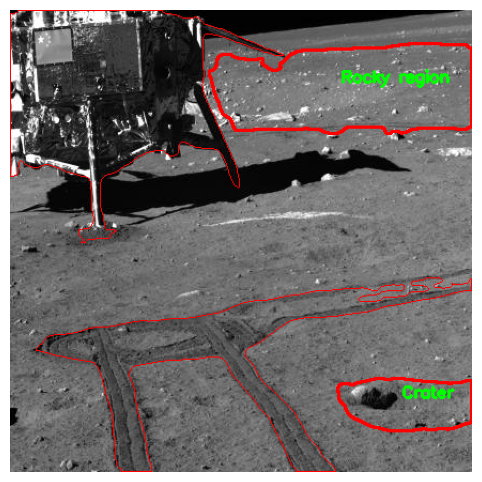

In [7]:
import cv2
import numpy as np
from measurement import polygon_diameter_m ,polygon_area_m2
import matplotlib.pyplot as plt
lst=['Rocky region', 'Crater' ,'Boulder']

for obj in predictions['predictions']:
    class_name = obj['class'].capitalize()
    polygon_points = [(p['x'], p['y']) for p in obj['points']]
    
    # Calculate diameter and area using your functions
    if class_name in lst:
        diameter_m = polygon_diameter_m(polygon_points,'Chang 3')  # replace with mission name or variable
        area_m2 = polygon_area_m2(polygon_points,"Chang 3")
    
    # Describe location
        loc_label = describe_location(obj['x'], obj['y'], obj['width'], obj['height'], img_width, img_height)
    
    # Print user-friendly textual output
        print(f"{class_name} detected in the {loc_label} area of the image:")
        print(f"  Diameter: {diameter_m:.2f} m")
        print(f"  Area: {area_m2:.2f} m²\n")
    
    # Optional visualization
        img=np.array(img)
        img_2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.polylines(img, [np.array(polygon_points, np.int32)], isClosed=True, color=(255,0,0), thickness=2)
        cv2.putText(img, class_name, (int(obj['x']), int(obj['y']-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
        
        plt.figure(figsize=(8,6))
        plt.imshow(img)
        plt.axis("off")
        plt.show()


In [8]:
import math
from mission_details import add_or_update_mission ,show_missions 
from measurement import compute_resolution_m_per_pixel,get_path_poles

# Example: Chang'e 3 Navcam
focal_length_mm = 50.0       # Navcam / PCAM focal length
sensor_width_mm = 36.0       # full-frame equivalent, adjust for real sensor
image_width_px = 1024        # image width in pixels
distance_to_surface_m = 1.2  # camera height above ground

resolution_m = compute_resolution_m_per_pixel(focal_length_mm, sensor_width_mm, image_width_px, distance_to_surface_m)
#print(f"Estimated ground resolution for Chang'e 3 Navcam: {resolution_m:.6f} m/pixel")

# You can now store this in your mission DB
add_or_update_mission(
    mission="Chang 3",
    rover="Yutu",
    camera="Navcam",
    resolution_m_per_pixel=resolution_m,
    rover_height_m=distance_to_surface_m,
    camera_fov_deg=None,
    other_notes="Lunar landing 2013; estimated resolution"
)


Mission 'Chang 3' exists. Updating details...
Mission details saved!


ImportError: cannot import name 'get_path_poles' from 'measurement' (c:\Users\admin\Desktop\Chand.ai\measurement.py)

In [9]:
show_missions()

   Mission Rover  Camera  Resolution_m_per_pixel  Rover_Height_m  \
0  Chang 3  Yutu  Navcam                0.000844             1.2   

   Camera_FOV_deg                               Other_Notes  
0             NaN  Lunar landing 2013; estimated resolution  


In [ ]:
import math
import numpy as np

def get_path_poles(polygon):
    """
    Compute the start/end points and their directions using 8 compass points
    Returns:
        start_pt, end_pt, start_to_end_dir, end_to_start_dir, heading_deg
    """
    pts = np.array([(p['x'], p['y']) if isinstance(p, dict) else tuple(p) for p in polygon], dtype=float)
    
    if pts.shape[0] == 0:
        return None, None, "Undetermined", "Undetermined", None
    
    # Compute centroid
    cx, cy = pts.mean(axis=0)
    
    # Distances from centroid
    dists = np.hypot(pts[:,0]-cx, pts[:,1]-cy)
    idx1 = int(np.argmax(dists))
    start_pt = pts[idx1]
    
    # Remove start_pt temporarily
    pts2 = np.delete(pts, idx1, axis=0)
    dists2 = np.hypot(pts2[:,0]-cx, pts2[:,1]-cy)
    idx2 = int(np.argmax(dists2))
    end_pt = pts2[idx2]

    # Helper function: 8-point compass
    def angle_to_compass(dx, dy):
        angle = (math.degrees(math.atan2(-dy, dx)) + 360) % 360  # y-axis inverted for image coordinates
        # Divide circle into 8 sectors
        dirs = ["E", "NE", "N", "NW", "W", "SW", "S", "SE"]
        idx = round(angle / 45) % 8
        return dirs[idx]

    dx = end_pt[0] - start_pt[0]
    dy = end_pt[1] - start_pt[1]
    
    start_to_end_dir = angle_to_compass(dx, dy)
    end_to_start_dir = angle_to_compass(-dx, -dy)
    
    heading_deg = (math.degrees(math.atan2(-dy, dx)) + 360.0) % 360.0  # image y-axis inverted

    return tuple(start_pt), tuple(end_pt), start_to_end_dir, end_to_start_dir, heading_deg
    

for obj in predictions['predictions']:
    class_name = obj['class']
    polygon_points = [(p['x'], p['y']) for p in obj['points']]
    if class_name == "rover path":
# Example usage:
        start, end, start_dir, end_dir, heading = get_path_poles(polygon_points)

        print("Start Point:", start, "Direction:", start_dir)
        print("End Point:", end, "Direction:", end_dir)
        print("Heading (deg):", heading)



Start Point: (np.float64(389.0), np.float64(250.0)) Direction: E
End Point: (np.float64(401.0), np.float64(250.0)) Direction: W
Heading (deg): 0.0


In [ ]:
print()

Crater
